<center><a target="_blank" href="https://academy.constructor.org/">
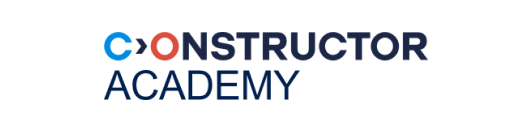</a> </center>
<hr />

# <h1 align="center"> Web Scraping with BeautifulSoup </h1>

<hr />
<center>Constructor Academy, 2024</center>

<!-- Last update: May 14, 2024 DB-->

## Table of Contents

- [1. Introduction to Webscraping](#1.-introduction-to-webscraping)
- [2. HTML Basics](#2.-html-basics)
- [3. The Requests Library](#3.-the-requests-library)
- [4. BeautifulSoup](#4.-beautifulsoup)

We can get a lot of data from several public and paid API's.

1. https://www.who.int/data/gho/  
2. https://data.fivethirtyeight.com/
3. https://data.gov/
4. https://data.unicef.org/
5. https://datasetsearch.research.google.com/

But what if we want to access data not offered this way? Data which we only see though a website's page.

## 1. Introduction to Webscraping

As we all know, the internet is a tremendous source of information, whatever your interest is. Ideally, every piece of interesting data would be available to download in the form of a csv file or equivalent, so that we could read it directly with pandas and start analyzing it. Of course, this is not the case.

The aim of this session is to demonstrate how you can extract information from web pages. This task is called
**Web scraping/web crawling**.

In Python, we use mainly 4 packages for web scraping/crawling:

- **[Requests](https://requests.readthedocs.io/en/master/user/quickstart/)**: is a package that lets you make http requests. In the context of web scraping, it allows you to get the content of a webpage, that can be further analyzed using a html parser.
- **[BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)**: is a library that allows you to extract information from html documents (but also xml, even though it is not relevant here.). This is exactly what we need since html is the standard language to write webpages.
- [Selenium](https://selenium-python.readthedocs.io): is a library you can use for web pages that are rendered in real-time (e.g. have to physically click buttons, scroll down, ...).
- [Scrapy](https://scrapy.org): is a library to create web-spiders, scripts that perform web-crawling.

In this course, we learn how to use requests in combination with BeautifulSoup to extract online data. To do so, we first need to understand how information is structured on a web page.

## 2. HTML Basics

HyperText Markup Language (HTML) is a language that web pages are created in. HTML is not a programming language, like Python — instead, it is a **markup language**: it tells browsers how to layout content. HTML allows you to do similar things to what you do in a word processor like Microsoft Word — make text bold, create paragraphs, and so on. Because HTML is not a programming language, it is not nearly as complex as Python.

### The components of a web page

When we visit a web page, our web browser makes a request to a web server. The server then sends back files that tell our browser how to render the page for us. The files fall into 4 main types:

* **HTML** — Contain the main content of the page.
* **CSS** — Add styling to make the page look nicer.
* **JS** — Javascript files add interactivity to web pages.
* **Images** — Image formats, such as JPG and PNG allow web pages to show pictures.


After our browser receives all the files, it renders the page and displays it to us. There's a lot that happens behind the scenes to render a page nicely, but we don't need to worry about most of it when web scraping: we are interested in the main content of the web page: HTML.

You can write html in the code cells of your jupyter notebook by using the `%%HTML` magic. Let's do that:

In [ ]:
%%HTML

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Div Layout</title>
    <style>
        .container {
            display: flex;
        }
        .side-by-side {
            width: 50%;
            box-sizing: border-box;
            border: 2px solid black;
            background-color: lightgray;
            padding: 10px;
        }
        #main-top {
            margin-bottom: 20px;
            border: 2px solid black;
            background-color: lightblue;
            padding: 10px;
            text-align: center;
        }
        a {
            color: darkblue;
            text-decoration: none;
        }
        a:hover {
            text-decoration: underline;
        }
    </style>
</head>
<body>
    <div id="main-top">
        <h1>Main Div at the Top</h1>
        <p>This is a <span>paragraph</span> with some text in the main div. <a href="https://www.example.com" target="_blank">Visit our site</a></p>
    </div>
    <div class="container">
        <div class="side-by-side">
            <h2>Side by Side Div 1</h2>
            <p>This is a <span>paragraph</span> with some text in the first side-by-side div.</p>
        </div>
        <div class="side-by-side">
            <h2>Side by Side Div 2</h2>
            <p>This is a <span>paragraph</span> with some text in the second side-by-side div. Here is a <a href="https://www.example2.com" target="_blank">link</a>.</p>
        </div>
    </div>
</body>
</html>

In [ ]:
## End of HTML example

In HTML, the information is organized in the form of nested elements. Each html element is delimited by tags, for example:

- **`<html>  ... </html>`** is the tag that defines the root element: it tells the web browser that everything inside of it is HTML.
- Right inside the HTML tag, we have **`<head> ... </head>`** and **`<body> ... </body>`** tags.
- The **`<p> ... </p>`** tag defines the paragraph, and any text inside the tag is shown as a separate paragraph.
- the **`<a> ... </a>`** tag declares a link to another webpage. The `href` property determines where the link goes.
- **``<div>``** — Indicates a division, or area, of the page.
- **``<b>``** — Bolds any text inside.
- **``<i>``** — Italicizes any text inside.
- **``<table>``** — Creates a table.
- **``<form>``** — Creates an input form.

Additionally, in HTML, apart from the generic `<div>`, there are specific types of “divs” or elements that help define the structure of a webpage more clearly:

1. **`<header>`**: Used for the top part of a page or section, often containing titles or navigation menus.
2. **`<footer>`**: Defines the bottom part, typically for copyright information or links.
3. **`<article>`**: Represents a self-contained piece of content, like a blog post or news article.
4. **`<section>`**: A generic section, usually with a heading, grouping thematically related content.
5. **`<nav>`**: For navigation links, helping users find different parts of a site.
6. **`<aside>`**: Used for tangentially related content, like sidebars.
7. **`<main>`**: Represents the main content of a page; there should be only one `<main>` per page.
8. **`<figure>` and `<figcaption>`**: For images, diagrams, or code, with `<figcaption>` providing a caption.
9. **`<details>` and `<summary>`**: Creates an expandable and collapsible section, with `<summary>` giving a brief heading.
10. **`<mark>`**: Highlights parts of text for emphasis.

Using these elements helps make your website more accessible and easier to understand, as they provide extra information about the role of each part of your page.

Checkout the full list of tags [here](https://developer.mozilla.org/en-US/docs/Web/HTML/Element).



The best way to learn about html is to explore the source code of actual webpages. You can do that in your browser. The procedure is slightly different depending on web browsers, in google chrome, you can just type `Ctrl`/`Cmd` + `Shift` + `C`. This is the result you have if you visit [Job.ch](https://www.jobs.ch/en/vacancies/?term=Data%20Engineer) (searching for Data Engineer):

<center><a target="_blank" href="https://www.jobs.ch/">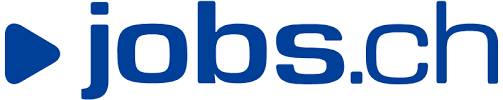</a> </center>

The pannel on the right side of the window shows you the raw html document. You can recognize the tags that we talked about and many more. While webscraping, we will alternate between this window and the jupyter notebook window.

Html elements can also contain **attributes**. Attributes provide extra information about an HTML element. All attributes are made up of two sections − a name and a value. Common attributes include `id`, `title`, `class` and `style`. These attributes are specified within the tags. For example checkout a close up from the same page source code:

![](https://lh3.googleusercontent.com/d/1I6exoU9KIzaXnHk9fC_w0btIMsOXCE7_)

`id` attributes a name to an HTML element, `class` assigns html elements to groups. These properties make elements easier to interact with when we are scraping. One element can have multiple classes, and a class can be shared between elements. Each element can only have one id and it can only be used once on a page. `class` and `id` are optional, and not all elements will have them.

## 3. The Requests Library

The first thing we need to do to scrape a web page is to download it. We can do so using the Python `requests` library. The requests library will make a `GET` request to a web server, which will download the HTML contents of a given web page for us. After running our request, one gets a Response object. This object has a `status_code` property, which indicates if the page was downloaded successfully. A `status_code` of 200 means that the page downloaded successfully. We won't fully dive into status codes here, but a status code starting with a 2 generally indicates success, and a code starting with a 4 or a 5 indicates an error.
The page content can be printed using `page.content`.

In [ ]:
import requests

let's start with a simple page:

In [ ]:
# making a request to a webpage
page = requests.get("http://dataquestio.github.io/web-scraping-pages/simple.html")
print(page)
print(page.status_code) ## prints 200 as status code
print(page.content) ## prints the entire webpage content

<Response [200]>
200
b'<!DOCTYPE html>\n<html>\n    <head>\n        <title>A simple example page</title>\n    </head>\n    <body>\n        <p>Here is some simple content for this page.</p>\n    </body>\n</html>'


In [ ]:
print(page.content.decode())

<!DOCTYPE html>
<html>
    <head>
        <title>A simple example page</title>
    </head>
    <body>
        <p>Here is some simple content for this page.</p>
    </body>
</html>


- When making a request to an external service, your system will need to wait for an answer before moving on.
- By default, requests waits indefinitely, so you should almost always specify a `timeout` duration to prevent your script from getting stuck:

In [ ]:
page = requests.get("http://dataquestio.github.io/web-scraping-pages/simple.html",
                    timeout=1)

The `timeout` variable denotes the maximum number of seconds that `requests.get()` will wait for an answer.

Let's see the content for the jobs.ch page:

In [ ]:
page = requests.get("https://www.jobs.ch/en/vacancies/?term=python%20developer", timeout=2)
print(page)
print(page.status_code)
print(page.content[:1000])

<Response [200]>
200
b'<!doctype html>\n<html class="legacy"  lang="en">\n  <head>\n    <meta charset="utf-8">\n    <meta name="viewport" content="width=device-width, initial-scale=1.0" />\n\n    <!-- No cache for index.html -->\n    <meta http-equiv="Pragma" content="no-cache" />\n    <meta http-equiv="cache-control" content="no-cache, must-revalidate" />\n\n    <title>191 Python developer jobs - jobs.ch</title>\n\n    <!-- Preconnects : only first party origin and used everywhere! -->\n\n    <link rel="preconnect" href="https://media.jobs.ch/" />\n    \n\n    \n    <link rel="preconnect" href="//c.jobs.ch" />\n    \n\n    <!-- Fonts -->\n    \n      <link as="font" type="font/woff2" href="/public/fonts/03d2aa5e66b427f22f38.woff2" importance="high" fetchpriority="high" crossorigin />\n    \n      <link as="font" type="font/woff2" href="/public/fonts/1f8b60e7a2f4cbdb085a.woff2" importance="high" fetchpriority="high" crossorigin />\n    \n      <link as="font" type="font/woff2" href="/p

In [ ]:
page.content

b'<!doctype html>\n<html class="legacy"  lang="en">\n  <head>\n    <meta charset="utf-8">\n    <meta name="viewport" content="width=device-width, initial-scale=1.0" />\n\n    <!-- No cache for index.html -->\n    <meta http-equiv="Pragma" content="no-cache" />\n    <meta http-equiv="cache-control" content="no-cache, must-revalidate" />\n\n    <title>191 Python developer jobs - jobs.ch</title>\n\n    <!-- Preconnects : only first party origin and used everywhere! -->\n\n    <link rel="preconnect" href="https://media.jobs.ch/" />\n    \n\n    \n    <link rel="preconnect" href="//c.jobs.ch" />\n    \n\n    <!-- Fonts -->\n    \n      <link as="font" type="font/woff2" href="/public/fonts/03d2aa5e66b427f22f38.woff2" importance="high" fetchpriority="high" crossorigin />\n    \n      <link as="font" type="font/woff2" href="/public/fonts/1f8b60e7a2f4cbdb085a.woff2" importance="high" fetchpriority="high" crossorigin />\n    \n      <link as="font" type="font/woff2" href="/public/fonts/fd84e3051

As you can see, finding elements within `page.content` is difficult. That is where BeautifulSoup will assist us.

## 4. BeautifulSoup

BeautifulSoup is a html and xml parser. It means that it analyses the contents of a html or xml document and provides methods the access specific elements of the document. In this section, we will parse `page.content` using BeautifulSoup and create a pandas dataframe that contains:

- job title
- posting date
- company
- location
- link to job add

### Import libraries and parse the page content

In [ ]:
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36"
}
url = "https://www.jobs.ch/en/vacancies/?term=data%20scientist"
page = requests.get(url,
                    headers=headers,
                    timeout=2)
print(page.status_code)
page.content[:10000]

200


b'<!doctype html>\n<html  lang="en">\n  <head>\n    <meta charset="utf-8">\n    <meta name="viewport" content="width=device-width, initial-scale=1.0" />\n\n    <!-- No cache for index.html -->\n    <meta http-equiv="Pragma" content="no-cache" />\n    <meta http-equiv="cache-control" content="no-cache, must-revalidate" />\n\n    <title>494 Data scientist jobs - jobs.ch</title>\n\n    <!-- Preconnects : only first party origin and used everywhere! -->\n\n    <link rel="preconnect" href="https://media.jobs.ch/" />\n    \n\n    \n    <link rel="preconnect" href="//c.jobs.ch" />\n    \n\n    <!-- Fonts -->\n    \n      <link as="font" type="font/woff2" href="/public/fonts/03d2aa5e66b427f22f38.woff2" importance="high" fetchpriority="high" crossorigin />\n    \n      <link as="font" type="font/woff2" href="/public/fonts/1f8b60e7a2f4cbdb085a.woff2" importance="high" fetchpriority="high" crossorigin />\n    \n      <link as="font" type="font/woff2" href="/public/fonts/fd84e3051ac1afa72e7a.woff2

In [ ]:
soup = BeautifulSoup(page.content, "html.parser") # converts the page content into a BeautifulSoup object

In [ ]:
type(soup)

bs4.BeautifulSoup

In [ ]:
dir(soup)

['ASCII_SPACES',
 'DEFAULT_BUILDER_FEATURES',
 'DEFAULT_INTERESTING_STRING_TYPES',
 'EMPTY_ELEMENT_EVENT',
 'END_ELEMENT_EVENT',
 'NO_PARSER_SPECIFIED_WARNING',
 'ROOT_TAG_NAME',
 'START_ELEMENT_EVENT',
 'STRING_ELEMENT_EVENT',
 '__bool__',
 '__call__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_all_strings',
 '_clone',
 '_decode_markup',
 '_event_stream',
 '_feed',
 '_find_all',
 '_find_one',
 '_format_tag',
 '_indent_string',
 '_is_xml',
 '_lastRecursiveChild',
 '_last_descenda

We now have a BeautifoulSoup object that contains all the content of the original webpage in a format that is much easier to access. For example you can extract all the text content of the page by typing:

In [ ]:
soup.get_text(';')[:5000]

"\n;\n;\n;\n;\n;\n;\n;\n;494 Data scientist jobs - jobs.ch;\n;\n;\n;\n;\n;\n;\n;\n;\n;\n;\n;\n;\n;\n;\n;\n;\n;\n;\n;\n;\n;\n;\n;\n;\n;\n;\n;\n;\n;\n;\n;\n;\n;\n;\n;\n;\n;\n;\n;\n;\n;\n;\n;\n;\n;\n;\n;\n;\n;\n;\n;\n;\n;Skip to content;jobs.ch Navigation logo;Find a job;Explore companies;Compare salaries;Recruiter Area;Hire now for free; ;Deutsch;Français;English;Login;Find a job;Explore companies;Compare salaries;Recruiter Area;Hire now for free; ;My account;Login;Don't have an account yet?;Sign up;Select Language;Deutsch;Français;English;Job title, keywords or company;data scientist;Place of work or region;Choose a region;Search;All filters;Published since;Workload;Commute time;Occupational field;Contract type;Language;All filters;Reset filters;494 Data scientist job offers;Relevance;Newest;Relevance;Published: 20 August 2024;20 Aug;Recommended;Master Data Specialist (w/m);Bern;Unlimited employment; ;HCI Solutions AG;Published: 23 August 2024;23 Aug;GIS Specialist / GIS Data Scientist 

In [ ]:
len(soup.find_all())

1571

In [ ]:
soup.find_all()[800]

<button class="ddvpnG jXSfKH kDediT jHGcsU glsFka ewOPvj hHneSz notranslate" data-cy="bookmark-icon-unchecked" id="vacancy-bookmark-icon-584eaa05-ab50-4567-9f15-96717118bb18" title="Save" type="button"><span class="fzCRHk jZcEMP"><svg aria-hidden="true" class="bjbWfd hYZFjI hYZFkb" focusable="false" viewbox="0 0 24 24"><path d="m12 17.41-4.2 2.9c-.667.283-1.3.23-1.9-.162-.6-.392-.9-.946-.9-1.663V5.51c0-.55.196-1.02.588-1.412A1.926 1.926 0 0 1 7 3.51h10c.55 0 1.02.196 1.413.588.391.391.587.862.587 1.412v12.975c0 .717-.3 1.27-.9 1.663-.6.391-1.233.445-1.9.162l-4.2-2.9Zm0-2.4 5 3.45V5.51H7v12.95l5-3.45Z"></path></svg></span></button>

You can find the first element that has tag `<a>...</a>` by typing:

In [ ]:
soup.find('a')

<a class="iHuMgw jHNYuy bcHobI dtOCeN DYzlj gmRehT bUyOMB epzRSc pkGrk jXSfKH kFYpjC kcZqLU bOLTeD" href="#skip-link-target">Skip to content</a>

In [ ]:
type(soup.find('a'))

bs4.element.Tag

In [ ]:
soup.find('a').get_text('_')

'Skip to content'

In [ ]:
soup.find('a').text

'Skip to content'

And you can find all elements that have tags `<a>...</a>` by typing:

In [ ]:
len(soup.find_all('a'))

85

In [ ]:
soup.find_all('a')[:3]

[<a class="iHuMgw jHNYuy bcHobI dtOCeN DYzlj gmRehT bUyOMB epzRSc pkGrk jXSfKH kFYpjC kcZqLU bOLTeD" href="#skip-link-target">Skip to content</a>,
 <a class="bZRhvx cSwxkB cRsIyI bYdksK kFYpjC eUXhEi gVWcUQ guNUTj fHRMvP kWjTSc jHMASb" data-cy="header-logo" href="/en/" title="Home"><span class="bYPznF bUyOMB fzpnUg kIIaya unbqo eEZHw daAGav"><span class="jXSfKH ATIhi ATIgZ fzpabv gnlqYH fLiHww cbkwRf dcQHwf fzpoby">jobs.ch Navigation logo</span><svg aria-hidden="true" fill="currentColor" focusable="false" viewbox="0 0 120 24"><path d="m11.8,10.69l-7.8,-4.64c-2.2,-1.21 -4,-0.202 -4,2.42v9.277c0,2.52 1.8,3.63 4,2.32l7.9,-4.64c2.1,-1.31 2.1,-3.427 -0.1,-4.737"></path><path d="m35.9,5.647c-7.6,0 -8.5,1.815 -8.5,7.462s1,7.36 8.5,7.36s8.5,-1.816 8.5,-7.36c0,-5.65 -1,-7.464 -8.5,-7.464m0,12.202c-3.9,0 -4.2,-0.808 -4.2,-4.74s0.3,-4.84 4.2,-4.84s4.2,0.908 4.2,4.84c0,3.83 -0.3,4.74 -4.2,4.74m21,-12.203c-2.2,0 -4.5,0.303 -5.4,2.118h-0.2v-7.156c0,-0.303 -0.3,-0.606 -0.60001,-0.606h-3.1c-0.3,0 -0.6

In [ ]:
soup.find_all('div')[16]

<div class="gmRehT eiyHav ciQNOx" data-clarity-mask="true"><span class="fzCRHk jZcEMP" data-cy="icon-user-avatar"><svg aria-hidden="true" class="bjbWfd hYZFjI hYZFkb" focusable="false" viewbox="0 0 24 24"><path d="M12 12c-1.1 0-2.042-.392-2.825-1.175C8.392 10.042 8 9.1 8 8s.392-2.042 1.175-2.825C9.958 4.392 10.9 4 12 4s2.042.392 2.825 1.175C15.608 5.958 16 6.9 16 8s-.392 2.042-1.175 2.825C14.042 11.608 13.1 12 12 12zm6 8H6c-.55 0-1.02-.196-1.412-.587A1.927 1.927 0 0 1 4 18v-.8c0-.567.146-1.088.438-1.563A2.914 2.914 0 0 1 5.6 14.55a14.866 14.866 0 0 1 3.15-1.163A13.776 13.776 0 0 1 12 13c1.1 0 2.183.129 3.25.387 1.067.259 2.117.646 3.15 1.163.483.25.87.612 1.162 1.087.292.475.438.996.438 1.563v.8a1.93 1.93 0 0 1-.587 1.413A1.928 1.928 0 0 1 18 20zM6 18h12v-.8a.943.943 0 0 0-.137-.5.977.977 0 0 0-.363-.35 13.03 13.03 0 0 0-2.725-1.013 11.615 11.615 0 0 0-5.55 0A13.03 13.03 0 0 0 6.5 16.35a.97.97 0 0 0-.5.85v.8zm6-8c.55 0 1.021-.196 1.413-.588C13.804 9.021 14 8.55 14 8c0-.55-.196-1.02-.58

but you can also filter through tags using attributes:

In [ ]:
for tag in soup.find_all('div', {'class':'rhxFI'}):
  print(tag.get_text())

Don't have an account yet?Sign up
Job title, keywords or companydata scientist
Place of work or regionChoose a region
494 Data scientist job offers
RelevanceNewestRelevance
Master Data Specialist (w/m)
GIS Specialist / GIS Data Scientist 80-100% (m/w/d)
Data Quality Manager 80-100% (w/m/d)
Data Engineer (w/m/d) 80-100%
Real-World Data Adoption Lead
Data Business Analyst à 100%
Data Engineer & Analyst
IT Data Analytics Engineer
Data Analysis und Automation Specialist (m/w/d), 80-100%
Spécialiste acheminement & approvisionnement (H/F) 100%
Ingénieur bases de données (f/h)
Cloud Data Platform Expert/Architect
Data Governance Professional (a)
Sales Campaign Automation Manager
Projektleiter-in Entwicklung und Akquisition
Software Engineer on Risk Analytics (Ref. 2462)
Senior Translational Scientist
Application Scientist Medical Nutrition
Data Specialist
Medical Affairs & Patient Data Specialist
Coordinator of Laboratory workplace & sustainability Initiatives (m/w/d)


Yet, when we separate the tags with a comma, it instructs the query to find a tag containing at least one of the given values, not necessarily all of them.

In [ ]:
len(soup.find_all('a', {'class':['bZRhvx','cSwxkB','cRsIyI']}))

84

In [ ]:
soup.find('a',
 {'class': "bZRhvx cSwxkB cRsIyI bYdksK kFYpjC gVWcUQ guNUTj fHRMvP kWjTSc cGFOJB bkzFSZ hYZFjI group"}
              ).text

'Published: 20 August 202420 AugRecommendedMaster Data Specialist (w/m)BernUnlimited employment HCI Solutions AG'

In [ ]:
soup.find_all('a', {'data-cy':"job-link"})[1].get_text()

'Published: 23 August 202423 AugGIS Specialist / GIS Data Scientist 80-100% (m/w/d)ZürichUnlimited employment Wüest Partner'

In [ ]:
span_tag = soup.find_all('span', {'class':"pkwpM rhxvA cFGrCm bkzFSZ gnlqYH hWhrno insEvP coifVi bULnTY krbBcV fluar jGjvJV fzopXD"})[0]
span_tag

<span class="pkwpM rhxvA cFGrCm bkzFSZ gnlqYH hWhrno insEvP coifVi bULnTY krbBcV fluar jGjvJV fzopXD">GIS Specialist / GIS Data Scientist 80-100% (m/w/d)</span>

In [ ]:
?span_tag.*par*
#help()

In [ ]:
#span_tag.parent.parent.parent

In [ ]:
job_tag = soup.find_all('a', {'data-cy':"job-link"})[1]
for span in job_tag.find_all('span'):
  print(span.text)

Published: 23 August 2024
23 Aug


GIS Specialist / GIS Data Scientist 80-100% (m/w/d)




In [ ]:
job_tag.attrs

{'data-cy': 'job-link',
 'tabindex': '0',
 'title': 'GIS Specialist / GIS Data Scientist 80-100% (m/w/d)',
 'class': ['bZRhvx',
  'cSwxkB',
  'cRsIyI',
  'bYdksK',
  'kFYpjC',
  'gVWcUQ',
  'guNUTj',
  'fHRMvP',
  'kWjTSc',
  'cGFOJB',
  'bkzFSZ',
  'hYZFjI',
  'group'],
 'href': '/en/vacancies/detail/ccdf59bd-912f-431a-8a81-7cde08eb9107/?source=vacancy_search'}

In [ ]:
for el in job_tag.find_all():
  if 'data' in el.text.lower():
    print(el.name, el.attrs, el.text)

div {'data-cy': 'vacancy-serp-item', 'class': ['fPSBzf', 'jZzPrs', 'ceZrQJ', 'iRgpoQ', 'hYZFjI', 'pkGrk', 'jTWvec']} Published: 23 August 202423 AugGIS Specialist / GIS Data Scientist 80-100% (m/w/d)ZürichUnlimited employment Wüest Partner
div {'class': ['rhxFI']} GIS Specialist / GIS Data Scientist 80-100% (m/w/d)
span {'class': ['pkwpM', 'rhxvA', 'cFGrCm', 'bkzFSZ', 'gnlqYH', 'hWhrno', 'insEvP', 'coifVi', 'bULnTY', 'krbBcV', 'fluar', 'jGjvJV', 'fzopXD']} GIS Specialist / GIS Data Scientist 80-100% (m/w/d)


In [ ]:
#soup.find_all(attrs={'data-cy':"job-link"})

[<a class="bZRhvx cSwxkB cRsIyI bYdksK kFYpjC gVWcUQ guNUTj fHRMvP kWjTSc cGFOJB bkzFSZ hYZFjI group" data-cy="job-link" href="/en/vacancies/detail/8f526290-eefa-47d4-bd4c-a9ec8611dc36/?source=vacancy_search_promo" tabindex="0" title="Master Data Specialist (w/m)"><div class="fPSBzf hoRIwT ceZrQJ iRgpoQ hYZFjI pkGrk jTWvec" data-cy="vacancy-serp-item-active"><div class="cYdhWw bYPztT cBdsKF jQcCSq jCSsdd jHMAHT" data-cy="serp-item-8f526290-eefa-47d4-bd4c-a9ec8611dc36"><p class="kdhObr gBZaqx guWTdM iJtYVN kcTPXi kzxVke kdhOlz cbkwRf"><span class="jXSfKH ATIhi ATIgZ fzpabv gnlqYH fLiHww cbkwRf dcQHwf fzpoby">Published: 20 August 2024</span><span aria-hidden="true" class="" title="20 August 2024">20 Aug</span></p><span class="bYPztT fEVEmD kTLTmN gglcqk"><span class="cbkwRf bYPztT kDqGZC ceZrQJ fEVEmD bZkbcj rhxBT hFiQcv fdiXMQ jwZLzO kyQzFv" data-cy="recommended">Recommended</span></span></div><button class="ddvpnG jXSfKH kDediT jHGcsU glsFka ewOPvj hHneSz notranslate" data-cy="bookmark

In [ ]:
for tag in soup.find_all('a'):
  if 'href' in tag.attrs:
    if '/en/vacancies/detail' in tag.attrs['href']:
      print(tag, tag.attrs, tag.text)

<a class="bZRhvx cSwxkB cRsIyI bYdksK kFYpjC gVWcUQ guNUTj fHRMvP kWjTSc cGFOJB bkzFSZ hYZFjI group" data-cy="job-link" href="/en/vacancies/detail/8f526290-eefa-47d4-bd4c-a9ec8611dc36/?source=vacancy_search_promo" tabindex="0" title="Master Data Specialist (w/m)"><div class="fPSBzf hoRIwT ceZrQJ iRgpoQ hYZFjI pkGrk jTWvec" data-cy="vacancy-serp-item-active"><div class="cYdhWw bYPztT cBdsKF jQcCSq jCSsdd jHMAHT" data-cy="serp-item-8f526290-eefa-47d4-bd4c-a9ec8611dc36"><p class="kdhObr gBZaqx guWTdM iJtYVN kcTPXi kzxVke kdhOlz cbkwRf"><span class="jXSfKH ATIhi ATIgZ fzpabv gnlqYH fLiHww cbkwRf dcQHwf fzpoby">Published: 20 August 2024</span><span aria-hidden="true" class="" title="20 August 2024">20 Aug</span></p><span class="bYPztT fEVEmD kTLTmN gglcqk"><span class="cbkwRf bYPztT kDqGZC ceZrQJ fEVEmD bZkbcj rhxBT hFiQcv fdiXMQ jwZLzO kyQzFv" data-cy="recommended">Recommended</span></span></div><button class="ddvpnG jXSfKH kDediT jHGcsU glsFka ewOPvj hHneSz notranslate" data-cy="bookmark-

If we are trying to be more specific with our query, we can use the `.select()` method. Selectors provide a way to select and manipulate HTML elements based on their id, class, attributes, and hierarchy in the document.

In comparison to `.find()`, `.select()` requires that all the values given in the query are a match.

In [ ]:
#<p class="kdhObr gBZaqx guWTdM">Unlimited employment</p>

In [ ]:
soup.find('p', attrs={'class':"kdhObr gBZaqx guWTdM"})

<p class="kdhObr gBZaqx guWTdM">Bern</p>

In [ ]:
#soup.select('p.kdhObr.guWTdM')
soup.select_one('p.kdhObr.guWTdM')

<p class="kdhObr gBZaqx guWTdM iJoQdq jSyDFY fxVyNy cGFOJB kdbMeA gsjAMe jsxrFy pkwcn pBpiI">Hire now for free<!-- --> <span class="jSuYRq fzCRHk dfzzzq"><svg aria-hidden="true" class="bjbWfd hYZFjI hYZFkb" focusable="false" viewbox="0 0 24 24"><path d="m21.793 11.337-2.134.384a1.05 1.05 0 0 1-.815-.17 1.049 1.049 0 0 1-.444-.704 1.049 1.049 0 0 1 .17-.816c.168-.24.403-.389.705-.443l2.133-.385c.303-.054.574.003.816.17.24.168.389.403.443.705.055.302-.002.574-.17.815-.167.241-.402.39-.704.444Zm-3.963 4.9a.99.99 0 0 1 .616-.552 1.12 1.12 0 0 1 .839.069l1.937.972a.99.99 0 0 1 .552.617 1.12 1.12 0 0 1-.07.838.99.99 0 0 1-.616.552 1.12 1.12 0 0 1-.839-.07l-1.937-.972a.99.99 0 0 1-.552-.616 1.12 1.12 0 0 1 .07-.839Zm1.162-11.885L17.516 5.94c-.217.222-.47.342-.761.357a.99.99 0 0 1-.77-.301 1.119 1.119 0 0 1-.358-.762.99.99 0 0 1 .302-.77l1.476-1.588a1.12 1.12 0 0 1 .761-.357.99.99 0 0 1 .77.301c.223.217.342.471.358.762a.99.99 0 0 1-.302.77ZM5.11 16.546l-1.067.192a2.087 2.087 0 0 1-1.62-.355 2.

In [ ]:
soup.find('a',{'data-cy':"job-link"}).attrs['href']

'/en/vacancies/detail/8f526290-eefa-47d4-bd4c-a9ec8611dc36/?source=vacancy_search_promo'

In [ ]:
soup.find('a',{'data-cy':"job-link"}).get('data-cy')

'job-link'

Now that we know how to extract data from a webpage, let's find the relevant html elements for our project. We need to locate them in the original page:

### Browse the source code in a web browser

The html code inspector is slightly different depending on your web browser. Here, we use Chrome. With Chrome, we can select the following icon at the top of the code inspector tab:

![](https://lh3.googleusercontent.com/d/1piq5H0kGqufsgeKQTs5VifXCGwDBVs1e)

This allows us to select any component of the page and find the corresponding element in the html code. Let's do this for the list of jobs:

![](https://lh3.googleusercontent.com/d/1gpxxDzK0WZR73rLGNVIHkHEqP17X1CN_)

After navigating within the html element tree, we observe that each job box is a seperate `div`element and has the `class` attribute `VacancySerpItem__ShadowBox-qr45cp-0`.

![](https://lh3.googleusercontent.com/d/1p3_xg7cS8Era6dl4dHKsePxAtprMNeYR)

Note that websites get updated, so the name of the class might be different by the time you follow this tutorial!

Here, we can get the html element for a job by typing:

In [ ]:
len(soup.find_all('article'))

21

In [ ]:
one_job_ad = soup.find('article')
one_job_ad

<article aria-selected="true" class="cZBkHX iKjtAe eXMQhb iwKkEr jFkRne dyEHjL evDBxa bEojx bbiGDJ idUWTB eobeGm klNjEf iKkViO frsCVg iAISll jZFqNC cBNaOR bqVlrZ CTOn ceZrQJ hYZFjI jTWvec" data-cy="serp-item" role="tab"><a class="bZRhvx cSwxkB cRsIyI bYdksK kFYpjC gVWcUQ guNUTj fHRMvP kWjTSc cGFOJB bkzFSZ hYZFjI group" data-cy="job-link" href="/en/vacancies/detail/8f526290-eefa-47d4-bd4c-a9ec8611dc36/?source=vacancy_search_promo" tabindex="0" title="Master Data Specialist (w/m)"><div class="fPSBzf hoRIwT ceZrQJ iRgpoQ hYZFjI pkGrk jTWvec" data-cy="vacancy-serp-item-active"><div class="cYdhWw bYPztT cBdsKF jQcCSq jCSsdd jHMAHT" data-cy="serp-item-8f526290-eefa-47d4-bd4c-a9ec8611dc36"><p class="kdhObr gBZaqx guWTdM iJtYVN kcTPXi kzxVke kdhOlz cbkwRf"><span class="jXSfKH ATIhi ATIgZ fzpabv gnlqYH fLiHww cbkwRf dcQHwf fzpoby">Published: 20 August 2024</span><span aria-hidden="true" class="" title="20 August 2024">20 Aug</span></p><span class="bYPztT fEVEmD kTLTmN gglcqk"><span class="cbkwR

To find all of them, we can write:

In [ ]:
job_ads = soup.find_all('article')

In [ ]:
len(job_ads)

21

We obtain a list of 21 job ads! Each component of the list contains the html element describing the job ad:

In [ ]:
job_ads[0]

<article aria-selected="true" class="cZBkHX iKjtAe eXMQhb iwKkEr jFkRne dyEHjL evDBxa bEojx bbiGDJ idUWTB eobeGm klNjEf iKkViO frsCVg iAISll jZFqNC cBNaOR bqVlrZ CTOn ceZrQJ hYZFjI jTWvec" data-cy="serp-item" role="tab"><a class="bZRhvx cSwxkB cRsIyI bYdksK kFYpjC gVWcUQ guNUTj fHRMvP kWjTSc cGFOJB bkzFSZ hYZFjI group" data-cy="job-link" href="/en/vacancies/detail/8f526290-eefa-47d4-bd4c-a9ec8611dc36/?source=vacancy_search_promo" tabindex="0" title="Master Data Specialist (w/m)"><div class="fPSBzf hoRIwT ceZrQJ iRgpoQ hYZFjI pkGrk jTWvec" data-cy="vacancy-serp-item-active"><div class="cYdhWw bYPztT cBdsKF jQcCSq jCSsdd jHMAHT" data-cy="serp-item-8f526290-eefa-47d4-bd4c-a9ec8611dc36"><p class="kdhObr gBZaqx guWTdM iJtYVN kcTPXi kzxVke kdhOlz cbkwRf"><span class="jXSfKH ATIhi ATIgZ fzpabv gnlqYH fLiHww cbkwRf dcQHwf fzpoby">Published: 20 August 2024</span><span aria-hidden="true" class="" title="20 August 2024">20 Aug</span></p><span class="bYPztT fEVEmD kTLTmN gglcqk"><span class="cbkwR

now that we have identified the data blocks for jobs, we can extract the individual pieces of information. Let's start with the link to the job ad. This will be located within a `<a>` tag, and we are interested in the `href` attribute:

In [ ]:
job_ads[0].find('a').get('href')

'/en/vacancies/detail/8f526290-eefa-47d4-bd4c-a9ec8611dc36/?source=vacancy_search_promo'

Obtaining the link can be done without specifying any attribute, as that is the sole content of the `a` tag in one job-ad box. However, it is advisable to specify the attribute to prevent confusion or in cases where there could be more than one `a` tag.

In [ ]:
job_ads[0].find('a', {'data-cy': 'job-link'}).get('href')

'/en/vacancies/detail/8f526290-eefa-47d4-bd4c-a9ec8611dc36/?source=vacancy_search_promo'

We get the link to the job ad page but to access the page from outside, we need to add 'https://www.jobs.ch' as prefix:

In [ ]:
'https://www.jobs.ch' + job_ads[0].find('a',{'data-cy' : 'job-link'}).get('href')

'https://www.jobs.ch/en/vacancies/detail/8f526290-eefa-47d4-bd4c-a9ec8611dc36/?source=vacancy_search_promo'

let's check it works for other links:

In [ ]:
['https://www.jobs.ch' + job.find('a',{'data-cy' : 'job-link'}).get('href') for job in job_ads]

['https://www.jobs.ch/en/vacancies/detail/8f526290-eefa-47d4-bd4c-a9ec8611dc36/?source=vacancy_search_promo',
 'https://www.jobs.ch/en/vacancies/detail/ccdf59bd-912f-431a-8a81-7cde08eb9107/?source=vacancy_search',
 'https://www.jobs.ch/en/vacancies/detail/0e2fa774-9d88-4c1b-bc91-83ab8baba798/?source=vacancy_search',
 'https://www.jobs.ch/en/vacancies/detail/ab27613b-fb35-4d16-a205-70d7986a406b/?source=vacancy_search',
 'https://www.jobs.ch/en/vacancies/detail/c819111e-70ad-46b9-a787-79a6a978b20a/?source=vacancy_search',
 'https://www.jobs.ch/en/vacancies/detail/8f7b6a39-1722-44b4-bfc9-8472f0fa4688/?source=vacancy_search',
 'https://www.jobs.ch/en/vacancies/detail/88f3e965-7bb2-455c-a832-a249a6f8f07a/?source=vacancy_search',
 'https://www.jobs.ch/en/vacancies/detail/10fa2e2f-506f-4bca-b4a6-083ecc619863/?source=vacancy_search',
 'https://www.jobs.ch/en/vacancies/detail/dca00f06-cdbc-459b-8fd1-7aeeef4da826/?source=vacancy_search',
 'https://www.jobs.ch/en/vacancies/detail/db5d8fc6-3cb1-4c

now we can see that in the `<a>`element, we have an attribute called title, which corresponds the the title of the ad:

In [ ]:
for tag in job_ads[0].find_all():
  print(tag.name, tag.text, tag.attrs)

a Published: 20 August 202420 AugRecommendedMaster Data Specialist (w/m)BernUnlimited employment HCI Solutions AG {'data-cy': 'job-link', 'tabindex': '0', 'title': 'Master Data Specialist (w/m)', 'class': ['bZRhvx', 'cSwxkB', 'cRsIyI', 'bYdksK', 'kFYpjC', 'gVWcUQ', 'guNUTj', 'fHRMvP', 'kWjTSc', 'cGFOJB', 'bkzFSZ', 'hYZFjI', 'group'], 'href': '/en/vacancies/detail/8f526290-eefa-47d4-bd4c-a9ec8611dc36/?source=vacancy_search_promo'}
div Published: 20 August 202420 AugRecommendedMaster Data Specialist (w/m)BernUnlimited employment HCI Solutions AG {'data-cy': 'vacancy-serp-item-active', 'class': ['fPSBzf', 'hoRIwT', 'ceZrQJ', 'iRgpoQ', 'hYZFjI', 'pkGrk', 'jTWvec']}
div Published: 20 August 202420 AugRecommended {'data-cy': 'serp-item-8f526290-eefa-47d4-bd4c-a9ec8611dc36', 'class': ['cYdhWw', 'bYPztT', 'cBdsKF', 'jQcCSq', 'jCSsdd', 'jHMAHT']}
p Published: 20 August 202420 Aug {'class': ['kdhObr', 'gBZaqx', 'guWTdM', 'iJtYVN', 'kcTPXi', 'kzxVke', 'kdhOlz', 'cbkwRf']}
span Published: 20 Augus

In [ ]:
job_ads[0].find('a',{'data-cy' : 'job-link'}).get('title')

'Master Data Specialist (w/m)'

However, we require additional details about the job posting. Upon examining the child tags, we observe that the remaining information is encapsulated within `p` tags. Regardless of whether these `p` tags contain further tags as a child or not, we can still retrieve the text from the child taga, if they exist.

In [ ]:
job_ads[0].find_all('p')

[<p class="kdhObr gBZaqx guWTdM iJtYVN kcTPXi kzxVke kdhOlz cbkwRf"><span class="jXSfKH ATIhi ATIgZ fzpabv gnlqYH fLiHww cbkwRf dcQHwf fzpoby">Published: 20 August 2024</span><span aria-hidden="true" class="" title="20 August 2024">20 Aug</span></p>,
 <p class="kdhObr gBZaqx guWTdM">Bern</p>,
 <p class="kdhObr gBZaqx guWTdM">Unlimited employment</p>,
 <p class="kdhObr gBZaqx guWTdM iJtYVN"><strong>HCI Solutions AG</strong></p>]

This way, we notice that it always come in the following order:

- job title
- company
- location
- date of publication

we can then extract the data using `find_all` and `.get_text()`:

In [ ]:
for section in job_ads[0].find_all('p'):
    print(section.get_text())

Published: 20 August 202420 Aug
Bern
Unlimited employment
HCI Solutions AG


However, some items may not display the information in a suitable format, such as the date in this example. This is why we might need to scrape each tag independently in certain cases. It all depends on how the data is presented.

In [ ]:
job_ads[0].select_one('p > span')

<span class="jXSfKH ATIhi ATIgZ fzpabv gnlqYH fLiHww cbkwRf dcQHwf fzpoby">Published: 20 August 2024</span>

In [ ]:
job_ads[0].select_one('p > span').find_next()

<span aria-hidden="true" class="" title="20 August 2024">20 Aug</span>

Now, we can programmatically create a dataframe containing all the job posts found on the scraped page.

In [ ]:
import pandas as pd

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36"
}

profession = "Data Scientist"
processed_profesion = profession.lower().replace(" ", "%20")

url = f"https://www.jobs.ch/en/vacancies/?page=1&term={processed_profesion}"

page = requests.get(url, headers=headers, timeout=2)
soup = BeautifulSoup(page.content, "html.parser")

job_ads = soup.find_all('article')

df = pd.DataFrame(columns=['profession', 'title', 'query'])

for job in job_ads:
    try:
        title = job.find('a',{'data-cy' : 'job-link'}).get('title')
    except AttributeError:
        title = None

    try:
        location = job.find_all('p')[1].get_text()
    except AttributeError:
        location = None

    try:
        date = job.select_one('p > span').get_text()
    except AttributeError:
        date = None

    try:
        query = job.find('a', {'data-cy': 'job-link'}).get('href')
    except AttributeError:
        query = None


    job_dict = {
                "profession": profession,
                "title": title,
                "location": location,
                "date": date,
                "query": query
            }

    df = pd.concat(
        [df, pd.DataFrame([job_dict])],
        ignore_index=True,
    )

In [ ]:
df

,profession,title,query,location,date
0,Data Scientist,Master Data Specialist (w/m),/en/vacancies/detail/8f526290-eefa-47d4-bd4c-a...,Bern,Published: 20 August 2024
1,Data Scientist,GIS Specialist / GIS Data Scientist 80-100% (m...,/en/vacancies/detail/ccdf59bd-912f-431a-8a81-7...,Zürich,Published: 23 August 2024
2,Data Scientist,Data Quality Manager 80-100% (w/m/d),/en/vacancies/detail/0e2fa774-9d88-4c1b-bc91-8...,Adliswil,Published: 16 August 2024
3,Data Scientist,Data Engineer (w/m/d) 80-100%,/en/vacancies/detail/ab27613b-fb35-4d16-a205-7...,Cham,Published: 14 August 2024
4,Data Scientist,Real-World Data Adoption Lead,/en/vacancies/detail/c819111e-70ad-46b9-a787-7...,Basel,Published: 28 August 2024
5,Data Scientist,Data Business Analyst à 100%,/en/vacancies/detail/8f7b6a39-1722-44b4-bfc9-8...,Montreux,Published: 25 August 2024
6,Data Scientist,Data Engineer & Analyst,/en/vacancies/detail/88f3e965-7bb2-455c-a832-a...,Zürich,Published: 28 August 2024
7,Data Scientist,IT Data Analytics Engineer,/en/vacancies/detail/10fa2e2f-506f-4bca-b4a6-0...,Eschen,Published: 16 August 2024
8,Data Scientist,Data Analysis und Automation Specialist (m/w/d...,/en/vacancies/detail/dca00f06-cdbc-459b-8fd1-7...,Bern,Published: 22 August 2024
9,Data Scientist,Spécialiste acheminement & approvisionnement (...,/en/vacancies/detail/db5d8fc6-3cb1-4c46-90c6-3...,Bulle,Published: 28 August 2024


In [ ]:
total_pages = int(soup.find(attrs={'data-cy':"paginator"}).get_text(';').split(';')[-2])
total_pages

25

### Saving Extracted Data

In [ ]:
df.to_csv("data_scientist_jobs.csv")

## Conclusion:

You now know the most important commands to work with requests and BeautifulSoup and have fun extracting data from webpages!
If you would like to go further, here are resources you should checkout:

* [Web Scraping Tutorial](https://www.dataquest.io/blog/web-scraping-tutorial-python/)
* [Selenium](https://www.seleniumhq.org/) a library for javascript rendered pages,
* [Scrapy](https://scrapy.org) a python library for web crawling

But first, let's practice!